# Question 6

#### a) Find the conditional risk for each action $\alpha_i$


for each action i and each $x \subset \{ 0, 1\} $ we have: <br>
$$ R(\alpha_i|x) = \sum_j (C_{ij})p(w_j|x) = 
\sum_j (C_{ij})p(w_j)p(x|w_j) * \frac{1}{p(x)} $$



In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
density = np.array([[3/7,1/3,2/5,5/6],
                    [4/7, 2/3, 3/5, 1/6]])
cost= np.array([[0,3,2,1],
                [4,0,1,8],
                [7,1,0,5],
                [5,2,4,0]])
prior = np.array([3/8,1/8,2/8,2/8])

p_x = [0,0]
for x in [0,1]:
    sum=0
    for i in range(0,4):
        sum += prior[i]*density[x][i]
    p_x[x]=sum
print ("P(0) =", p_x[0], ", P(1) =", p_x[1])
# print (p_x)

P(0) = 0.5107142857142857 , P(1) = 0.48928571428571427


In [4]:
risk_array = np.zeros([2,4])
for x in [0,1]:
    for i in range(0, 4):
        sum =0
        for j in range (0, 4):
            sum+=prior[j]*cost[i][j]*density[x][j]
        sum/=p_x[x]
        risk_array[x][i]=sum
        
for x in [0,1]:
    for i in range(0,4):
        print ("Risk(alpha", i+1, "| x = ", x, ") =", risk_array[x][i]) 
        
    print ("---------------")
  

Risk(alpha 1 | x =  0 ) = 1.0442890442890445
Risk(alpha 2 | x =  0 ) = 4.717948717948718
Risk(alpha 3 | x =  0 ) = 4.3240093240093245
Risk(alpha 4 | x =  0 ) = 2.51981351981352
---------------
Risk(alpha 1 | x =  1 ) = 1.2092457420924574
Risk(alpha 2 | x =  1 ) = 2.7396593673965937
Risk(alpha 3 | x =  1 ) = 3.6618004866180045
Risk(alpha 4 | x =  1 ) = 3.7566909975669103
---------------


**So when x=0 the best action is to classify as class_1** <br>
**and when x=1 classify as class_1.**

#### b) Find the overall risk R .


By the definition of Conditional Risk Measure: "For a particular observation x , the goal is to minimize the expected loss by
selecting the action that minimizes the conditional risk." <br>
Overal risk is the expected risk when we choose the best action for each of the observation x. <br>
$$ \text{Overal Risk} = P(x=0)*(min(Risk(x=0))+P(x=1)*(min(Risk(x=1))$$

In [17]:
overal_risk = p_x[0]*risk_array[0][0]+p_x[1]*risk_array[1][0]
print ("Overal Risk:", overal_risk)

Overal Risk: 1.125


#### c) What is the optimal Bayes decision rule?

First we need to calculate $p(w_i|x)$

In [23]:
for x in [0,1]:
    for i in range(0,4):
        print ("P(w"+str(i+1)+" | x = "+str(x)+") =", prior[i]*density[x][i]/p_x[x])
    print ("-----------------")

P(w1 | x = 0) = 0.3146853146853147
P(w2 | x = 0) = 0.08158508158508158
P(w3 | x = 0) = 0.19580419580419584
P(w4 | x = 0) = 0.407925407925408
-----------------
P(w1 | x = 1) = 0.437956204379562
P(w2 | x = 1) = 0.170316301703163
P(w3 | x = 1) = 0.30656934306569344
P(w4 | x = 1) = 0.0851581508515815
-----------------


**So the optimal decision rule selects w4 as it observes x=0 and w1 as it observes x=1**

#### Now, assume the following conditional densities for two classes w1 and w2 in a binary classification problem with a scalar feature x as in the pdf.
#### d) Find $K_1$ and $K_2$ .

Since both distribution are in the form of normal distribution, we have to select $k_i$ equal to the coefficient of distributions.
$$K_i = \frac{1}{\sqrt{2\pi \sigma^2}}  $$

$$ k_1 = \frac{1}{\sqrt{20\pi}} , k_2 = \frac{1}{\sqrt{24\pi}}$$

#### e) Plot two densities on a single graph and draw the decision boundary.

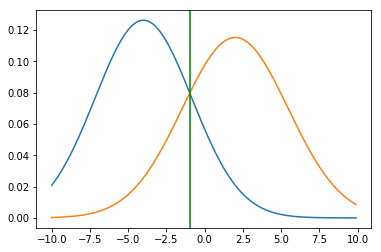

In [39]:
x =  np.arange(-10,10, 0.1)
plt.plot(x, norm.pdf(x,loc=-4, scale=np.sqrt(10)))
plt.plot(x, norm.pdf(x,loc=2, scale=np.sqrt(12)) )
plt.axvline(x=-0.95, c="g")
plt.show()